In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


Where do the guest come from?

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
df['children'].value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
df['babies'].value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

In [ ]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [ ]:
df['babies'].unique()

array([ 0,  1,  2, 10,  9])

In [ ]:
len(df[df['adults'] == 0])

403

In [ ]:
len(df[df['babies'] == 0])

118473

In [ ]:
filter = (df['children'] == 0) & (df['adults'] == 0) & (df['children'] == 0) 
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [ ]:
data = df[~filter]

In [ ]:
data.shape

(119210, 32)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
data['is_canceled'].unique()

array([0, 1])

In [ ]:
resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
City = data[(data['hotel'] == 'Resort Hotel')&(data['is_canceled'] == 0)]

In [ ]:
resort.shape

(28927, 32)

In [ ]:
City.shape

(28927, 32)

In [ ]:
resort['country'].value_counts()

PRT    10184
GBR     5922
ESP     3105
IRL     1734
FRA     1399
       ...  
UGA        1
COM        1
MUS        1
BIH        1
SAU        1
Name: country, Length: 119, dtype: int64

In [ ]:
labels = resort['country'].value_counts().index
values = resort['country'].value_counts()

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

In [ ]:
trace = go.Pie(labels = labels, values = values,
               hoverinfo='label+percent', textinfo='value')

In [ ]:
iplot([trace])

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
country_wise = data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise.columns = ['country','No of guests']
country_wise

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
b = folium.Map()

In [ ]:
country_wise.dtypes

country         object
No of guests     int64
dtype: object

In [ ]:
guests = px.choropleth(country_wise,
                       locations = country_wise['country'],
                       color = country_wise['No of guests'],
                       hover_name = country_wise['country'],
                       title = 'Home country of guests'
                       )

How much do guest pay per night?

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
data2 = data[data['is_canceled'] == 0]

In [ ]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

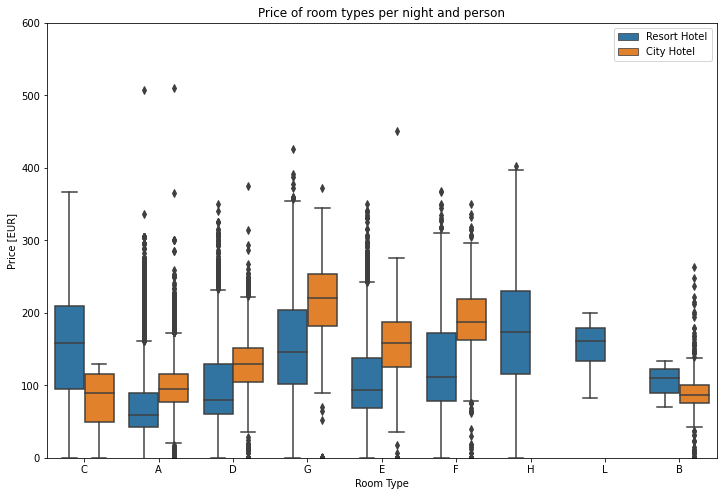

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',
            y = 'adr',
            hue = 'hotel',
            data = data2)
plt.title("Price of room types per night and person")
plt.xlabel("Room Type")
plt.ylabel("Price [EUR]")
plt.legend(loc = 'upper right')
plt.ylim(0, 600)
plt.show()

How does price vary per night over the year?

In [ ]:
data_resort = resort[resort['is_canceled'] == 0]

In [ ]:
data_city = City[City['is_canceled'] == 0]

In [ ]:
data_city

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,No Deposit,143.0,0.0,0,Transient,89.75,0,0,Check-Out,9/10/2017
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,No Deposit,250.0,0.0,0,Transient-Party,202.27,0,1,Check-Out,9/10/2017
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,No Deposit,250.0,0.0,0,Transient,153.57,0,3,Check-Out,9/12/2017
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,No Deposit,40.0,0.0,0,Contract,112.80,0,1,Check-Out,9/14/2017


In [ ]:
data_resort

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,No Deposit,143.0,0.0,0,Transient,89.75,0,0,Check-Out,9/10/2017
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,No Deposit,250.0,0.0,0,Transient-Party,202.27,0,1,Check-Out,9/10/2017
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,No Deposit,250.0,0.0,0,Transient,153.57,0,3,Check-Out,9/12/2017
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,No Deposit,40.0,0.0,0,Contract,112.80,0,1,Check-Out,9/14/2017


In [ ]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [ ]:
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [ ]:
final = resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns = ['month','price_for_resort','price_for_city_hotel']
final

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,75.867816
1,August,181.205892,181.205892
2,December,68.410104,68.410104
3,February,54.147478,54.147478
4,January,48.761125,48.761125
5,July,150.122528,150.122528
6,June,107.974850,107.974850
7,March,57.056838,57.056838
8,May,76.657558,76.657558
9,November,48.706289,48.706289


In [ ]:
pip install sort-dataframeby-monthorweek

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=480ef0159bcd18bf96a59afe22c5bba618a8542e6b1dab4b38d74d071001d250
  Stored in directory: /root/.cache/pip/wheels/f8/84/15/465a1c7eabab8605e82621b7aa658c99010f3564a43ccd06aa
Successfully built sort-dataframeby-monthorweek


In [ ]:
pip install sorted-months-weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3246 sha256=570de681b96eb246b97b461e9c2bc1e1bac73b6a40a9aaf12322ce6f564eeda1
  Stored in directory: /root/.cache/pip/wheels/9a/0d/2e/309df76f445367ea1777b73df0feb347b9c8d204ead35fdb10
Successfully built sorted-months-weekdays


In [ ]:
import sort_dataframeby_monthorweek as sd

In [ ]:
final = sd.Sort_Dataframeby_Month(df = final, monthcolumnname = 'month')
final

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,48.761125
1,February,54.147478,54.147478
2,March,57.056838,57.056838
3,April,75.867816,75.867816
4,May,76.657558,76.657558
5,June,107.974850,107.974850
6,July,150.122528,150.122528
7,August,181.205892,181.205892
8,September,96.416860,96.416860
9,October,61.775449,61.775449


In [ ]:
px.line(final,x='month',y=['price_for_resort','price_for_city_hotel'],title = 'Room Price per night over the month')

which are the month busy month or in which month guests are high?


In [ ]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
data_resort.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
rush_resort = data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns = ['month','no.of guests']
rush_resort

,month,no.of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [ ]:
rush_city = data_resort['arrival_date_month'].value_counts().reset_index()
rush_city.columns = ['month','no.of guests']
rush_city

,month,no.of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [ ]:
final_rush = rush_resort.merge(rush_city, on = 'month')
final_rush.columns = ['month','no.of guests in resort','no. of guests in city']
final_rush

,month,no.of guests in resort,no. of guests in city
0,August,3257,3257
1,July,3137,3137
2,October,2575,2575
3,March,2571,2571
4,April,2550,2550
5,May,2535,2535
6,February,2308,2308
7,September,2102,2102
8,June,2037,2037
9,December,2014,2014


In [ ]:
final_rush = sd.Sort_Dataframeby_Month(df = final_rush,monthcolumnname='month')
final_rush

,month,no.of guests in resort,no. of guests in city
0,January,1866,1866
1,February,2308,2308
2,March,2571,2571
3,April,2550,2550
4,May,2535,2535
5,June,2037,2037
6,July,3137,3137
7,August,3257,3257
8,September,2102,2102
9,October,2575,2575


In [ ]:
final_rush.dtypes

month                     object
no.of guests in resort     int64
no. of guests in city      int64
dtype: object

In [ ]:
px.line(data_frame = final_rush,x= 'month',
        y = ['no.of guests in resort','no. of guests in city'],
        title = 'Total no. of guests per months')